### Download the data
Let's download and uncompress our data and images here:

In [6]:
import platform
mysystem = platform.system()
# We need to first download the data here:
file_id = '1-mQuJbHvSq9nRugy96dr0aB7isfzaxMZ'
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
# Check for windows
if mysystem != 'Windows':
    !rm -rf assets # force delete because colab pauses while it waits for confirmation
    !rm -rf sample_data
    !rm -rf data
    !wget -O data.zip --no-check-certificate "$file_download_link"
    !unzip data.zip

print('Please download the data using the following link:', file_download_link)


--2022-11-17 06:10:01--  https://docs.google.com/uc?export=download&id=1-mQuJbHvSq9nRugy96dr0aB7isfzaxMZ
Resolving docs.google.com (docs.google.com)... 142.251.16.138, 142.251.16.102, 142.251.16.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cg1vmupt7kavp9pd3rgp17t25jhrf3pu/1668665400000/07583565538848666242/*/1-mQuJbHvSq9nRugy96dr0aB7isfzaxMZ?e=download&uuid=55c06715-1fb0-40cb-a436-3da4b58557ea [following]
--2022-11-17 06:10:02--  https://doc-0g-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cg1vmupt7kavp9pd3rgp17t25jhrf3pu/1668665400000/07583565538848666242/*/1-mQuJbHvSq9nRugy96dr0aB7isfzaxMZ?e=download&uuid=55c06715-1fb0-40cb-a436-3da4b58557ea
Resolving doc-0g-bc-docs.googleusercontent.com (doc-0g-bc-docs.googleusercontent.com)... 172.217.15.97, 2607:f8b0:4

# Artificial Neural Networks


### Contents
1. Artificial neural networks (ANNs) and their link to Logistic regression
2. Generalization of multi layer networks
3. Step by step implementation of our ANN class
4. Does it do what it is supposed to do?
    1. linear regression: 25 all over again!
    2. Another go at our Titanic dataset
    3. Complex fit of flowers
    4. Andrew Ng's cat vs non-cat classifying
5. Round up
**Apendix:**
- Data creation/processing for Rose / Cats
- Crude version of a hyperparameter sweep



## Artificial neural networks (ANNs) and their link to Logistic regression

When we would ask a random person about Machine Learning, there is a big chance that neural networks are mentioned. Not only does the terminology play with our imagination, but these mathematical structures have also proven themselves to solve complex tasks. Many of you have probably seen such a network and it almost radiates simplicity:

<img src="https://drive.google.com/uc?id=10yZYlGrKUh0uFDQ862TphkNjT3EBQBIS" alt="Artificial Neural Network example" width="500" style="display: block; margin: 0 auto" />


In this simple diagram, we show an artificial neural network (ANN), or just simply neural network (NN), which has three layers. By convention, we do not count the input layer, and later we see that this layer in the diagram represents the input data you feed into the NN. This particular NN has two hidden layers. While I am not sure why it exactly is called a hidden layer, I can imagine that one reason could be that these layers are 'hidden' from the user. A user inputs data through the input data and gets results from the output layer, therefore, not interacting with the hidden layers. The user would not see if there is just a single layer, two layers, or even ten layers. The output however, is an actual layer, in our case a single neuron, which 'collects' the results from the previous hidden layer.


A logistic regression can be seen as the tiniest possible NN, with just a single layer, consisting of a single neuron. A diagram of a logistic regression can look like this:

<img src="https://drive.google.com/uc?id=1W-qiH9eroJJUZR82Qy81liXnBK_knp37" alt="Artificial Neural Network example" width="400" style="display: block; margin: 0 auto" />

Let's do a short recap on this logistic model. First, we massaged the input data in such a way that the individual features ($x_1, x_2, x_3$) are in the rows of our input vector $X$, and the columns are the examples (training samples). This input vector $X$ is then forwarded to our single neuron, which can be divided in two parts. First, a linear operation (linear regression), $z = X W + b$, followed by an activation function $A = g(z)$. In our previous tutorial we performed binary logistic regression, which uses the sigmoid activation function $\sigma(z) = \frac{1}{1 + \exp{-z}}$. Here we generalize this by using $g(z)$ to indicate an activation function we have to define. As we will learn today, there are many other activation functions to choose from.

Before we can calculate the activation function we need to calculate the linear part $z$. This is the inner product of the weights vector $W$ and the input vector $X$, with the bias term $b$ added. The bias term $b$ and the weights vector $W$ (consisting of $w_1, w_2, w_3$) are the trainable parameters of this system. Each trainable weight ($w_1, w_2, w_3$) corresponds to an input feature ($x_1, x_2, x_3$) and represents the 'weight' this feature is adding to the problem. These weights are drawn inside the output layer frame, meaning that they are linked to this layer (inside this single neuron).


While logistic regression is a great tool, in can only divide the parameter space in a line, at least in the from we have presented here. For example, if you have two features $x_1$ and $x_2$, which will be used to predict $y$, a logistic classifier is only able to have a linear boundary between the two parameters. If this is not completely clear, we will have an example to show this problem.

To have the system predict more complex relations, we can add more neurons to a layer and even add more layers to our network. Each of this neuron is a kind of logistic regression unit and many of these combined can predict highly non-linear relations. I say kind of, because in a logistic regression we typically use the sigmoid function, while in a NN, many other activation function perform much better.

<img src="https://drive.google.com/uc?id=1E1iyQlEDcd7ARsnTS-Tgm3JaK3lGwfKB" alt="Artificial Neural Network example" width="500" style="display: block; margin: 0 auto" />

Before we will start to generalize a NN and the used layers, observe how the different neurons are connected. You will notice that each node is connected to all nodes of the next layer. This is called densely connected (sometimes fully connected) and such a layer is often called a 'Dense layer'. Now, lets try to define such structures.


## Generalization of multi layer networks

Before we can start to develop our system, lets try to first generalize the steps required. The goal of this tutorial is to create a general NN class in which we can add arbitrary number of layers, containing arbitrary number of neurons. Later we will test this structure on various problems with varying complexity.

When we think of the input layer, we have already discovered that it is not an actual layer of the neural network, but the training data, massaged in the right form. Therefore, the input 'layer' is not part of our architecture.

The neural network will however consist of an arbitrary number of layers. These will be structures that behave in a similar fashion and are sequetial to each other. When doing the forward pass, we will loop through all the layers and use the output of the previous layer as input for the current layer. The output of the final layer, also called the final activation $A$ is the output of the neural network. This means that, if the neural network is used to predict binary values, the output has to be converted (or rounded) to the actual predictions $\hat Y$.

To do one pass of gradient descent, we need to have the weights. For this, we need to calculate the gradient of the loss function with respect of $W$ and $b$ for each layer. To calculate the gradients, we can do a clever trick and cache the values of $z$ and $A$ during the forward pass. We need to do some bookkeeping here the most mathematically heavy part is quite doable.

After all gradients are calculated the weights are then updated using a simple gradient descent step. To make is visual I have created the following diagram:

<img src="https://drive.google.com/uc?id=1jLFZ28_VOCKXmYkaIhVK070gNOuQOSf7" alt="Artificial Neural Network example" width="700" style="display: block; margin: 0 auto" />

Here the forward pass calculates our loss and is used in the backward pass to calculate updated weights based on alpha. Next we calculate our loss again in the forward pass which then is used again in the next GD step to update weights based on the gradient descent step based on alpha. We do this until we minimize our loss past a certain threshold or after a certain number of iterations. We will now go into detail of these steps.

All layers in the network are fundamentally the same. They can differ in the amount of nodes or the activation function, but there is no structural difference between the first layer $L_1$ and the output layer $L_o$. 

As we will be creating only fully connected Dense layers, we can create a single structure to do the hard work. In this structure we have to do the math for the forward pass, the backward pass, and the update. The input of each layer is generally the output of the previous layer. Obviously, for the first layer, this is the input vector. For the backward pass, we sequentially go through the network in the reverse direction. However, here we need to do an addtional step. We need to calculate the gradients with respect to the defined loss function. For this we need to input the true labels $Y$ and the predicted output $A$ during the backward pass. After this, we again have that the previous gradient is the input for the next layer (remember: we are going backwards). Each layer handels the backwards pass in the same way:

<img src="https://drive.google.com/uc?id=13IN6rIkiSdCuT8lT8BSasCj4wdA_spGW" alt="Artificial Neural Network example" width="600" style="display: block; margin: 0 auto" />


For each layer, in the forward pass, in expects the output of the previous layer (or $X$). This is then cached for use during the backward pass. We calculate the linear part $z$ with one single vectorized inner product calculation for all neurons and add the bias term. We also cache this value of $z$ for the backward pass. Finally, we will calculate the activation function and pass the result to the next layer (or this is the output if it is the final layer).

The backward pass is just the forward pass in reverse, but expects the previous gradient as an input. We calculate the gradients, using the cached values of $A_p$ and $z_p$. As a last step we calculate $dA_p$ which will be the input to the next layer. I do not want to focus to much on the actual differentials, but will explain them a bit more in the code. If you really want to know how these differentials are calculated, I would suggest to get a pen and paper and try to calculate them. They are not hard and [Wolfram Alpha](https://www.wolframalpha.com/) can help you :-).


If it is not completely clear what each step is doing, do not worry to much about it. I will try to explain each step during the coding part. To have an idea, let us summarize what we will be making:

#### Dense Layer Class
- structure to hold an arbitrary number of nodes
- will have various activation functions
- will perform the forward pass through the single layer (z and A)
- will perform the backward pass for the layer
- will perform the update step for the layer

#### Neural Network Class
- structure to hold an arbitrary number of layers
- will perform the forward pass sequentially through all layers
- will do the cost calculation for various loss functions
- will perform the backward pass and calculate all gradients
- will do an update (a step of gradient descent)


## Step by step implementation of our ANN class

Now lets start to implement our NN classes. First import numpy

In [7]:
import numpy as np

Before we can define our main NN class, we need to define our Dense layer class. As I want to do some error checking, we will first define some custom Exceptions:

In [8]:
class ActivationDoesNotExist(Exception):
    """Valid activations are sigmoid, tanh, and relu, provided as a string"""
    pass

class InputDimensionNotCorrect(Exception):
    """Need to specify input dimension, i.e. input shape into the first layer"""
    pass

class LossFunctionNotDefined(Exception):
    """Loss function in cost() method not defined"""
    pass

These exception extend Python's default Exception class and now can be used with the 'raise' keyword to create an exception that tells the user what the mistake is. If you systems get larger, it is good practice to have meaningfull errors. Another great way is using the logging module.

Now we can begin with our new class called DenseLayer. This class takes an constructor with two required parameters:
- inputDimension, i.e. the number of features of the input vector, or the number of units from the previous layer
- units, i.e. the number of neurons in this layer
There are two more optional parameters:
- activation: here you can indicate what activation the layer should use. Defined are sigmoid, relu, tanh, and ''. The empty string indicates no activation, meaning we just have a regression.
- randomMultiplier is the value which the random weights are multiplied. Generally 0.01 is fine, but sometimes tweaking this number can help.

As there can me different activation functions and we do not want to chech which activation we have using an if-statement, we make a reference to the used activation functions in the init statement.

In the initialize method, the weights are initialized. Notice that the number of neurons nh (units) are in the rows, and the number of input features nx are the columns. This is required to make our dot product work later.

Another thing I learned recently is the use of 'self' in Python. While I though I understood the concept, I did not fully understand the concequences. The definition of the class is separated from the values of each instance. These values are stored in the self object, i.e. the object of the instance. In other programming languages it is common to define types it the class itself. However, in Python you have to define these in the init method. When not doing this, the variable is the same object in all your instances and you can get weird results. I just found this [blog-post](https://towardsdatascience.com/python-pitfall-mutable-default-arguments-9385e8265422) where Don Cross has a very clear explanation.


```python
class DenseLayer:
    def __init__(self, inputDimension, units, activation='', randomMultiplier=0.01):
        self.weights, self.bias = self.initialize(inputDimension, units, randomMultiplier)
        if activation == 'sigmoid':
            self.activation = activation
            self.activationForward = self.sigmoid
            self.activationBackward = self.sigmoidGrad
        elif activation == 'relu':
            self.activation = activation
            self.activationForward = self.relu
            self.activationBackward = self.reluGrad
        elif activation == 'tanh':
            self.activation = activation
            self.activationFunction = self.tanh
            self.activationBackward = self.tanhGrad
        elif activation != '':
            raise ActivationDoesNotExist
        else:
            self.activation = 'none'
            self.activationFunction = self.linear
            self.activationBackward = self.linear
    
    def initialize(self, nx, nh, randomMultiplier):
        weights = randomMultiplier * np.random.randn(nh, nx)
        bias = np.zeros([nh, 1])
        return weights, bias

```

Next we define all used activation functions. The sigmoid we already know from the previous Tutorial, however we also include tanh and relu, which are also very common activation functions.

Tanh or hyperbolic tangent in full is a function which is similar to the sigmoid, however it maps all real values between -1 and +1. It was very popular, before the Relu function made its way to the stage. 

Relu, which stands for Rectified linear unit, is probably the most popular activation function. It is fast to calculate and has often better results than the Tanh function. Therefore, if you are not sure, the Relu function is a great start. The Relu function maps all values smaller than 0 to zero and all values larger than 0 as the value itself. 

The last activation function we will introduce is called the linear function. This is the same as not having an activation function, and is just a placeholder. What comes in, comes out and we use it to test our previous excersise on Linear regression.

The backward pass needs the differentials of all these functions, which are provided with the Grad suffix. Feel free to check if these differentials are correct. One additional step for each Grad calculation is that we multiply the input gradient (dA0 with the calculated gradient. This is required because we use the [chain rule](https://en.wikipedia.org/wiki/Differentiation_rules#The_chain_rule) (continously through back propagation).


```python
    def sigmoid(self, Z):
            A = 1 / (1 + np.exp(-Z))
            return A
        
    def sigmoidGrad(self, dA):
            s = 1 / (1 + np.exp(-self.prevZ))
            dZ = dA * s * (1 - s)
            return dZ
    
    
    def relu(self, Z):
            A = np.maximum(0, Z)
            return A
        
    def reluGrad(self, dA):
            s = np.maximum(0, self.prevZ)
            dZ = (s>0) * 1 * dA
            return dZ 

        
    def tanh(self, Z):
            A = np.tanh(Z)
            return A

    def tanhGrad(self, dA):
            s = np.tanh(self.prevZ)
            dZ = (1 - s**2) * dA
            return dZ


    def linear(self, Z):
        return Z
```

Next, we define the forward propagation step, which should look very familiar:
```python
    def forward(self, A):
        Z = np.dot(self.weights, A) + self.bias
        self.prevZ = Z
        self.prevA = A
        A = self.activationForward(Z)
        return A
```

We first calculate the linear part. Store the values for Z and A for later use in the back propagation and next apply the activation function.


Before starting our backpropstep we need to define our loss function. For logistic regression it's done with the binary cross entropy, for which I will simply give the equation. 
\begin{equation}
loss = -\frac{1}{m}\sum_{i=1}^{m}y\log(A)+(1-y)\log(1-A)
\end{equation}

Now for the backwards pass, We would need to differentiate the Loss function with $W$ and $b$. Not to  bore you guys, 
I have provided these functions:

\begin{equation}
 \frac{\partial loss}{\partial W} = \frac{1}{m} \sum_{i=1}^m  X(A - Y)^T \\
 \frac{\partial loss}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A - y)
\end{equation}

In Python, this looks like this:

The backward propagation looks again similar to the previous tutorial, however we have split the backward activation part to the activation functions itself. Also this function expects to get dA, which is a more generalized form for multiple layers. In our previous single layer example we combined the differential of the loss function in this step. Now this step is in our NN class and not in each layer, as it is only required at the last layer.

```python
  def backward(self, dA):
        dZ = self.activationBackward(dA)
        m = self.prevA.shape[1]
        self.dW = 1 / m * np.dot(dZ, self.prevA.T)
        self.db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        prevdA = np.dot(self.weights.T, dZ)
        return prevdA 
```

The gradients are stored in the layer and can be used later by the update function, which performs the gradient descent step. This backward passes chain together for each layer as we will see later.


The final required function is the update function, which performs the gradient descent step. Nothing spectacular but it expects a learning rate.

```python
    def update(self, learning_rate):
        self.weights = self.weights - learning_rate * self.dW
        self.bias = self.bias - learning_rate * self.db
```


While not required, these next function help in printing the model

```python    
    def __repr__(self):
        act = 'none' if self.activation == '' else self.activation
        return f'Dense layer (nx={self.weights.shape[1]}, nh={self.weights.shape[0]}, activation={act})'
```


### The complete DenseLayer class

In [9]:
class DenseLayer:
    """
    A class to define fully connected layers.
    """
    
    def __init__(self, inputDimension, units, activation='', randomMultiplier=0.01):
        """
        Constructor:
          inputDimension: number of input features
          units: number of neurons in the layer
          activation: activation function applied to layer
            - options: 'sigmoid', 'tanh', 'relu', ''
          randomMultiplier: multiplier applied to the random weights during initialization
        """
        self.weights, self.bias = self.initialize(inputDimension, units, randomMultiplier)
        if activation == 'sigmoid':
            self.activation = activation
            self.activationForward = self.sigmoid
            self.activationBackward = self.sigmoidGrad
        elif activation == 'relu':
            self.activation = activation
            self.activationForward = self.relu
            self.activationBackward = self.reluGrad
        elif activation == 'tanh':
            self.activation = activation
            self.activationForward = self.tanh
            self.activationBackward = self.tanhGrad
        elif activation != '':
            raise ActivationDoesNotExist
        else:
            self.activation = 'none'
            self.activationForward = self.linear
            self.activationBackward = self.linear
    
    def initialize(self, nx, nh, randomMultiplier):
        """
        Initializes weights randomly:
          nx: number of input features
          nh: number of units
          randomMultiplier: multiplier applied to the random weights during initialization
        returns:
          weights: the randomly initialized weights
          bias: the bias terms
        """
        weights = randomMultiplier * np.random.randn(nh, nx)
        bias = np.zeros([nh, 1])
        return weights, bias

    
    def sigmoid(self, Z):
        """
        Sigmoid activation function
        """
        A = 1 / (1 + np.exp(-Z))
        return A
        
    def sigmoidGrad(self, dA):
        """
        Differential of sigmoid function with chain rule applied
        """
        s = 1 / (1 + np.exp(-self.prevZ))
        dZ = dA * s * (1 - s)
        return dZ
    
    
    def relu(self, Z):
        """
        Relu activation function
        """
        A = np.maximum(0, Z)
        return A
        
    def reluGrad(self, dA):
        """
        Differential of relu function with chain rule applied
        """
        s = np.maximum(0, self.prevZ)
        dZ = (s>0) * 1 * dA
        return dZ 

        
    def tanh(self, Z):
        """
        Tanh activation function
        """
        A = np.tanh(Z)
        return A

    def tanhGrad(self, dA):
        """
        Differential of tanh function with chain rule applied
        """
        s = np.tanh(self.prevZ)
        dZ = (1 - s**2) * dA
        return dZ


    def linear(self, Z):
        """
        Placeholder when no activation function is used
        """
        return Z
        
    
    def forward(self, A):
        """
        Forward pass through layer
          A: input vector
        """
        Z = np.dot(self.weights, A) + self.bias
        self.prevZ = Z
        self.prevA = A
        A = self.activationForward(Z)
        return A
    
    
    def backward(self, dA):
        """
        Backward pass through layer
          dA: previous gradient
        """
        dZ = self.activationBackward(dA)
        m = self.prevA.shape[1]
        self.dW = 1 / m * np.dot(dZ, self.prevA.T)
        self.db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        prevdA = np.dot(self.weights.T, dZ)
        return prevdA
    
    
    def update(self, learning_rate):
        """
        Update weights using gradients from backward pass
          learning_rate: the learning rate used in the gradient descent
        """
        self.weights = self.weights - learning_rate * self.dW
        self.bias = self.bias - learning_rate * self.db

        
    def outputDimension(self):
        """
        Returns the output dimension for the next layer
        """
        return len(self.bias)

    
    def __repr__(self):
        """
        Used to print a pretty summary of the layer
        """
        act = 'none' if self.activation == '' else self.activation
        return f'Dense layer (nx={self.weights.shape[1]}, nh={self.weights.shape[0]}, activation={act})'



### Alright, one down and one to go.
Next we will create a class that will combine the layers. It will also hold the loss function and has to calculate the gradient of the loss. For convenience, we will also add a wrapper to add layers and add a way to pretty print our model.

First we start again with the constructor, which has two options, the loss function to be used, and the randomMultiplier used for new layers. The loss function are again created in a function reference and are called using wrapper functions.

The model starts with no layers (empty).

```python
class NeuralNetwork:
    def __init__(self, loss='cross-entropy', randomMultiplier = 0.01):
        self.layers=[]
        self.randomMultiplier = randomMultiplier
        if loss=='cross-entropy':
            self.lossFunction = self.crossEntropyLoss
            self.lossBackward = self.crossEntropyLossGrad
        elif loss=='mean-square-error':
            self.lossFunction = self.meanSquareError
            self.lossBackward = self.meanSquareErrorGrad
        else:
            raise LossFunctionNotDefined
        self.loss=loss
```


The next function is a helper function to add layers to the model. You need to give the inputDimension, i.e. the number of input features of the first layer. For the second and further, it will look for the previous layer and use that as the input dimension.

You have to specify the number of neurons in the layer (units) and which activation function to use.

```python
    def addLayer(self, inputDimension=None, units=1, activation=''):
        if (inputDimension is None):
            if (len(self.layers)==0):
                raise InputDimensionNotCorrect
            inputDimension=self.layers[-1].outputDimension()
        layer = DenseLayer(inputDimension, units, activation, randomMultiplier= self.randomMultiplier)
        self.layers.append(layer)
```

Next we define the loss functions and their differentials. Feel free to check if the differentials are correct. the cost method is a wrapper to cal the cost in the training loop later.

```python
    def crossEntropyLoss(self, Y, A, epsilon=1e-15):
        m = Y.shape[1]
        loss = -1 * (Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
        cost = 1 / m * np.sum(loss)
        return np.squeeze(cost)
            
    def crossEntropyLossGrad(self, Y, A):
        dA = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
        return dA
    
    
    def meanSquareError(self, Y, A):
        loss = np.square(Y - A)
        m = Y.shape[1]
        cost = 1 / m * np.sum(loss)
        return np.squeeze(cost)
    
    def meanSquareErrorGrad(self, Y, A):
        dA = -2 * (Y - A)
        return dA

    
    def cost(self, Y, A):
        return self.lossFunction(Y, A)
```

The forward, backward, and update method are quite similar as they loop over the layers:

```python
    def forward(self, X):
        x = np.copy(X)
        for layer in self.layers:
            x = layer.forward(x)
        return x
            
    
    def backward(self, A, Y):
        dA = self.lossBackward(Y, A)
        for layer in reversed(self.layers):
            dA = layer.backward(dA)
    
    
    def update(self, learning_rate=0.01):
        for layer in self.layers:
            layer.update(learning_rate)
```

the backward pass first hast to calculate the first dA, which is de gradient between the activation and the real values. This is then looped through the layers to calculate all gradients.


The last two methods are again for pretty printing and one for trainable parameter counting. Nothing special.

### The complete NeuralNetwork class

In [10]:
class NeuralNetwork:
    """
    Neural Network structure that holds our layers
    """
    
    def __init__(self, loss='cross-entropy', randomMultiplier = 0.01):
        """
        Constructor:
          loss: the loss function. Two are defined:
             - 'cross-entropy' and 'mean-square-error'
          randomMultiplier: multiplier applied to the random weights during initialization
        """
        self.layers=[]
        self.randomMultiplier = randomMultiplier
        if loss=='cross-entropy':
            self.lossFunction = self.crossEntropyLoss
            self.lossBackward = self.crossEntropyLossGrad
        elif loss=='mean-square-error':
            self.lossFunction = self.meanSquareError
            self.lossBackward = self.meanSquareErrorGrad
        else:
            raise LossFunctionNotDefined
        self.loss=loss


    def addLayer(self, inputDimension=None, units=1, activation=''):
        """
        Adds a Dense layer to the network:
          inputDimension: required when it is the first layer. otherwise takes dimensions of previous layer.
          units: number of neurons in the layer
          activation: activation function: valid choices are: 'sigmoid', 'tanh', 'relu', ''
        """
        if (inputDimension is None):
            if (len(self.layers)==0):
                raise InputDimensionNotCorrect
            inputDimension=self.layers[-1].outputDimension()
        layer = DenseLayer(inputDimension, units, activation, randomMultiplier= self.randomMultiplier)
        self.layers.append(layer)

    def crossEntropyLoss(self, Y, A, epsilon=1e-15):
        """
        Cross Entropy loss function
          Y: true labels
          A: final activation function (predicted labels)
          epsilon: small value to make minimize chance for log(0) error
        """
        m = Y.shape[1]
        loss = -1 * (Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
        cost = 1 / m * np.sum(loss)
        return np.squeeze(cost)
            
    def crossEntropyLossGrad(self, Y, A):
        """
        Cross Entropy loss Gradient
          Y: true labels
          A: final activation function (predicted labels)
        """
        dA = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
        return dA
    
    
    def meanSquareError(self, Y, A):
        """
        Mean square error loss function
          Y: true labels
          A: final activation function (predicted labels)
        """
        loss = np.square(Y - A)
        m = Y.shape[1]
        cost = 1 / m * np.sum(loss)
        return np.squeeze(cost)
    
    def meanSquareErrorGrad(self, Y, A):
        """
        Mean square error loss gradient
          Y: true labels
          A: final activation function (predicted labels)
        """
        dA = -2 * (Y - A)
        return dA

    
    def cost(self, Y, A):
        """
        Cost function wrapper
          Y: true labels
          A: final activation function (predicted labels)
        """
        return self.lossFunction(Y, A)

        
    def forward(self, X):
        """
        Forward pass through the whole model.
          X: input vector
        """
        x = np.copy(X)
        for layer in self.layers:
            x = layer.forward(x)
        return x
            
    
    def backward(self, A, Y):
        """
        backward pass through the whole model
          Y: true labels
          A: final activation function (predicted labels)
        """
        dA = self.lossBackward(Y, A)
        for layer in reversed(self.layers):
            dA = layer.backward(dA)
    
    
    def update(self, learning_rate=0.01):
        """
        Update weights and do a step of gradient descent for the whole model.
          learning_rate: learning_rate to use
        """
        for layer in self.layers:
            layer.update(learning_rate)
    
    
    def __repr__(self):
        """
        Pretty print the model
        """
        layrepr = ['  ' + str(ix+1)+' -> ' + str(x) for ix, x in enumerate(self.layers)]
        return '[\n' + '\n'.join(layrepr) + '\n]'
   
    
    def numberOfParameters(self):
        """
        Print number of trainable parameters in the model
        """
        n = 0
        for layer in self.layers:
            n += np.size(layer.weights) + len(layer.bias)
        print(f'There are {n} trainable parameters in the model.')
            

Alright, the classes are done. Now we need to put these classes to a test. While it looks quite ordered, a small error in one of the differentials can make our whole system useless. Therefore, we will test in small steps in the next section. Looking forward for the spin!

## 1. Does it do what it is supposed to do?

Nothing is more ennoying than waiting for nothing. Therefore, it is important to first test the easy things instead of training for hours to see that you made a mistake in the loss function. Let us repeat the experiments from last time

### Linear regression: 25 all over again!

We created an array with a couple of input values $X$. Next we supplied $Y$ using the super duper complicated formula $y = 2x + 1$. In Numpy this looks like this:

In [11]:
import numpy as np

In [12]:
X = np.arange(-2, 5, 1).reshape([1, 7]) # Columns as examples
Y = 2 * X + 1

Now we will build our model which will try to find our difficult formula and match the true value of 25. For this we will initiate our fresh class and set the loss to mean-square-error. Next we will add a single layer, with a single neuron and no activation function. Lets also try our pretty print :-)

In [13]:
np.random.seed(1)

model = NeuralNetwork(loss='mean-square-error')
model.addLayer(inputDimension=1, units=1, activation='')
model

[
  1 -> Dense layer (nx=1, nh=1, activation=none)
]

Now we will need our training loop again. It will look very familiar to our logistic regression model from last time:

In [14]:
num_iterations = 1000
for ix in range(num_iterations):
    A = model.forward(X)
    model.backward(A, Y)
    model.update()
    if ix % 100 == 0:
        print('cost:', model.cost(Y, A)) 

cost: 24.643963268924306
cost: 0.009408179907957642
cost: 0.00043269013393172113
cost: 1.989979716251954e-05
cost: 9.152090515935006e-07
cost: 4.2091263608210285e-08
cost: 1.935813975001762e-09
cost: 8.902977540761639e-11
cost: 4.094557128292547e-12
cost: 1.8831225851087109e-13


The cost decreases as expected and due to the long training the value is close to machine precision. Would we again find 25 when we use the forward?

In [15]:
model.forward(12)

array([[25.00000019]])

Of course we do!

### A go at our Titanic dataset

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('./data/titanic/train_data.csv')
df = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
Y = df['Survived'].to_numpy().reshape([1, -1])
X = df.drop(columns = 'Survived')
X = df.iloc[:,1:].to_numpy().T

In [18]:
X.shape

(14, 792)

In [19]:
Y.shape

(1, 792)

We need to change the model to have 14 input features and of course the sigmoid activation function. The loss function will be cross-entropy, which is the default, so we do not need to specify it.

In [20]:
np.random.seed(1)

model = NeuralNetwork()
model.addLayer(inputDimension=14, units=1, activation='sigmoid')
model

[
  1 -> Dense layer (nx=14, nh=1, activation=sigmoid)
]

Last time, we had an train accuracy of 80%. Can we match this as well?

In [21]:
def roundValue(A):
    return np.uint8( A > 0.5)

def accuracy(yhat, Y):
    return round(np.sum(yhat==Y) / len(yhat.flatten()) * 1000) / 10

In [22]:
num_iterations = 8000
for ix in range(num_iterations):
    A = model.forward(X)
    model.backward(A, Y)
    model.update()
    if ix % 1000 == 0:
        yhat = roundValue(A)
        print('cost:', model.cost(Y, A), f'\taccuracy: {accuracy(yhat, Y)}%')     

cost: 0.6912384614194468 	accuracy: 58.7%
cost: 0.5140056920509907 	accuracy: 75.9%
cost: 0.4824062497934128 	accuracy: 79.5%
cost: 0.4697113881273363 	accuracy: 79.5%
cost: 0.46275860969195476 	accuracy: 79.8%
cost: 0.4580742945870081 	accuracy: 79.8%
cost: 0.4544915367177524 	accuracy: 79.8%
cost: 0.4515471545581365 	accuracy: 80.8%


Of course we can!

## Q1: We will now implement customization via Keras as the examples above are specific to their respective datasets and are for example only to work through for learning purposes only. **They will not properly run if customized** (25 points)

In [23]:
# Prerequisite library imports
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Let's reimport our data
df = pd.read_csv('./data/titanic/train_data.csv')
X = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
y = df['Survived']
X = X.drop(columns = 'Survived')

### 1.1) Above we use the Keras libraries to build the model. Here we want to implement a form of scaling to your data either through minmax normalization or z-score standardization using the sklearn.preprocessing libraries (MinMaxScalar or StandardScaler). Justify why you chose one over the other. If the data is already scaled, you still must choose to normalize or standardize. (10 points) 

To decide whether we will standardize or only normalize our data, we will generate histograms to see if the data appears normal. If the data shows a normal distribution, it should be safe to standardize. I've removed the binary features to make the data more readable, and since normalization doesn't affect those anyways.

In [24]:
import seaborn as sns

In [25]:
# df.drop(labels=['Unnamed:0', 'PassengerId', 'Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3'])
onlyContinuous = df.drop(labels=['Unnamed: 0', 'PassengerId', 
                'Sex', 'Pclass_1','Pclass_2','Pclass_3',
                'Title_1', 'Title_2', 'Title_3', 'Title_4',
                'Emb_1', 'Emb_2', 'Emb_3'], axis=1)

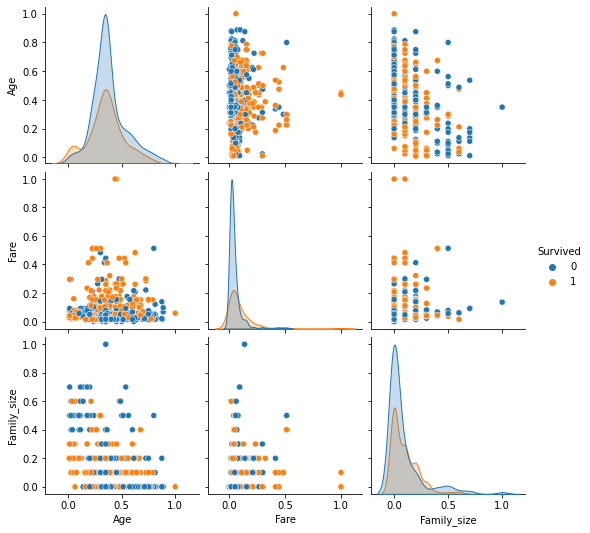

In [26]:
sns.pairplot(onlyContinuous, hue='Survived')

Based on the pairplot, we should normalize rather than standardize, since the data does not appear normal already.

In [27]:
# Please use your scalarization of X here: then run the cell below to split your training and test data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])
X = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

(633, 14)

(633,)

### 1.2) Using the example for traindata above create a model using different activation functions by setting MYACTIVATIONFXN: (10 points) 

```python
# Hint! Start with model.add(Dense(units = 16, activation = 'relu', input_dim = ?))
# Make sure the input_dim parameter is set to the number of features in your X matrix.
MYACTIVATIONFXN = 'SOMEFXN'
model.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = ?)) # input dimension should be the number of features
```


In [29]:
# Let's initialize our model
model = Sequential() # Initialising the ANN

In [30]:
# If you decide to initially use a sigmoid, make sure the number of units matches the number of targets
# in this case we only have 1 target so for sigmoid you need to set units to 1
MYACTIVATIONFXN = 'sigmoid'
model.add(Dense(units = 1, activation = MYACTIVATIONFXN, input_dim = X.shape[1]))

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [31]:
from keras.metrics import Precision
from keras.metrics import Recall

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

### Here we will run our ANN using the fit function using a batch size of 1 and 10 epochs (In the examples above iterations is used instead of epochs). Feel free to play with batch_size and epochs.

In [32]:
model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10)

Epoch 1/10
633/633 [==============================] - 2s 2ms/step - loss: 0.6987 - accuracy: 0.5498 - precision: 0.4238 - recall: 0.5356
Epoch 2/10
633/633 [==============================] - 1s 2ms/step - loss: 0.6008 - accuracy: 0.6872 - precision: 0.7071 - recall: 0.2929
Epoch 3/10
633/633 [==============================] - 1s 2ms/step - loss: 0.5637 - accuracy: 0.7251 - precision: 0.8283 - recall: 0.3431
Epoch 4/10
633/633 [==============================] - 1s 2ms/step - loss: 0.5391 - accuracy: 0.7583 - precision: 0.8839 - recall: 0.4142
Epoch 5/10
633/633 [==============================] - 1s 2ms/step - loss: 0.5197 - accuracy: 0.7820 - precision: 0.8976 - recall: 0.4770
Epoch 6/10
633/633 [==============================] - 1s 2ms/step - loss: 0.5069 - accuracy: 0.7820 - precision: 0.8741 - recall: 0.4937
Epoch 7/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4954 - accuracy: 0.7962 - precision: 0.8526 - recall: 0.5565
Epoch 8/10
633/633 [=====================

### 1.3) How does the error (in terms of precission and recall) differ between your model and the example? Write in one paragraph or less how the error differs and why. (5 points) 

In [33]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# Please see the BCC jupyter notebook to see how to do this

In [34]:
yhat_test = model.predict(X_test)
yhat_test_bin = [0 if a < 0.5 else 1 for a in yhat_test]

5/5 [==============================] - 0s 2ms/step


In [35]:
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [36]:
testdf = pd.DataFrame()
testdf['y_test'] = y_test
testdf['yhat_test'] = yhat_test_bin
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf.yhat_test.sum()

56

The model accuracy is 0.8215, which places it slightly above the example model accuracy. This means that given the 14 features, the model predicted whether the passenger survived 82.15% of the time. The precision is 0.8182, which means that of the passengers identified as surviving, 81.82% were correctly identified. Recall is 0.6778, which means that only 67.78% of the surviving passengers were identified as surviving by the model. 

Further research is warranted, but the model could likely be improved by adding hidden layers and experimenting with different activation functions.

## 2) Complex fit of flowers

The cool stuf starts with more complex functions. The [Deep learning course from Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) show a way to predict [Rose-functions](https://en.wikipedia.org/wiki/Rose_(mathematics)) using a model with multiple nodes. Lets try that as well!

First we need to import the data:

In [37]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, Y = data['X'], data['Y']

To give a feel how it looks, we will first plot the rose, which has 7 petals:

In [38]:
import matplotlib.pyplot as plt

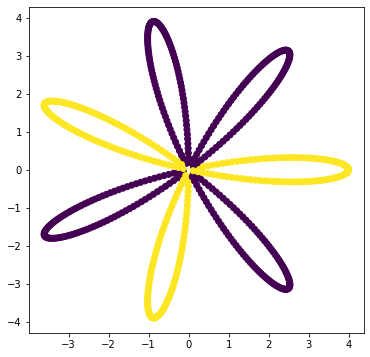

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[0,:], X[1,:], c=Y.flatten())

We discussed before that a logistic regression model, like we have defined in our previous example, can only divide in a line. Lets try this out, as the data is clearly not defined in a line.

In [40]:
np.random.seed(1)
model = NeuralNetwork()
model.addLayer(inputDimension=2, units=1, activation='sigmoid')
model

[
  1 -> Dense layer (nx=2, nh=1, activation=sigmoid)
]

In [41]:
num_iterations = 1000
for ix in range(num_iterations):
    A = model.forward(X)
    model.backward(A, Y)
    model.update(learning_rate=1.2)
    if ix % 1000 == 0:
        print('cost:', model.cost(Y, A)) 

cost: 0.6927732264810165


A short piece of code to generate a contour plot and our Rose

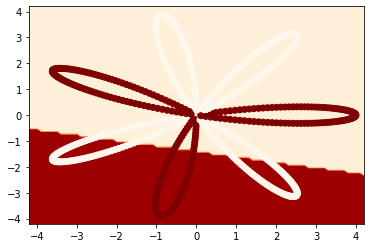

In [42]:
def testModel(X, Y, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.forward(((np.c_[xmesh.ravel(), ymesh.ravel()]).T))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.OrRd)
testModel(X, Y)

Definitely not a great fit and clearly a line. Now lets add another layer with four units to the model, with the last layer being the same sigmoid layer. The activation function for this model we keep similar to the one from Andrew, which was a tanh.

In [43]:
np.random.seed(1)

model = NeuralNetwork()
model.addLayer(inputDimension=2, units=4, activation='tanh')
model.addLayer(units=1, activation='sigmoid')
model

[
  1 -> Dense layer (nx=2, nh=4, activation=tanh)
  2 -> Dense layer (nx=4, nh=1, activation=sigmoid)
]

In [44]:
num_iterations = 4000
for ix in range(num_iterations):
    A = model.forward(X)
    model.backward(A, Y)
    model.update(learning_rate=1.2)
    if ix % 1000 == 0:
        print('cost:', model.cost(Y, A)) 

cost: 0.6931058695708833
cost: 0.01872511046013704
cost: 0.01096037547619666
cost: 0.0077232644078200656


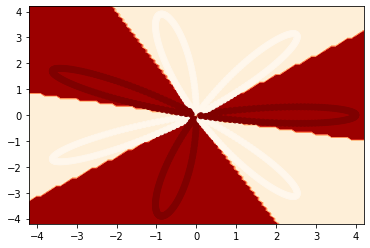

In [45]:
testModel(X,Y)

This is something that really amazes me. Just a tiny layer more and we have the power to learn this much more complex function. Really great stuff!

## Q2: We will now implement customization via Keras as the examples above are specific to their respective datasets and are for example only to work through for learning purposes only. They will not properly run if customized (30 points)

In [46]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, y = data['X'].transpose(), data['Y'].transpose()
display(X.shape)
display(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
# moved line to next block so model resets when testing different layers

(688, 2)

(688, 1)

(550, 2)

(550, 1)

### 2.1) Using the example above, try different number of nodes(units) and different activation functions. How does your loss change? (10 points) 

In [47]:
model = Sequential() # Initialising the ANN
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
550/550 [==============================] - 2s 2ms/step - loss: 0.7081 - accuracy: 0.6709 - precision_1: 0.6245 - recall_1: 0.6475
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.6330 - accuracy: 0.7000 - precision_1: 0.6756 - recall_1: 0.6230
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5785 - accuracy: 0.6945 - precision_1: 0.6743 - recall_1: 0.6025
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.6982 - precision_1: 0.6840 - recall_1: 0.5943
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4862 - accuracy: 0.7636 - precision_1: 0.8239 - recall_1: 0.5943
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4443 - accuracy: 0.8600 - precision_1: 0.9418 - recall_1: 0.7295
Epoch 7/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.9055 - precision_1: 0.9898 - recall_1: 0.7951
Epoch 8/10
55

In [48]:
model2 = Sequential() # Initialising the ANN
model2.add(Dense(6, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
model2.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
550/550 [==============================] - 2s 2ms/step - loss: 0.7415 - accuracy: 0.5764 - precision_2: 0.5214 - recall_2: 0.5492
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5658 - accuracy: 0.6964 - precision_2: 0.6758 - recall_2: 0.6066
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7709 - precision_2: 0.8554 - recall_2: 0.5820
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.8618 - precision_2: 0.9468 - recall_2: 0.7295
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8945 - precision_2: 0.9429 - recall_2: 0.8115
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.9255 - precision_2: 0.9903 - recall_2: 0.8402
Epoch 7/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.9364 - precision_2: 0.9772 - recall_2: 0.8770
Epoch 8/10
55

In [49]:
model_relu4 = Sequential()
model_relu4.add(Dense(4, activation='relu'))
model_relu4.add(Dense(1, activation='sigmoid'))
model_relu4.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
model_relu4.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
550/550 [==============================] - 2s 2ms/step - loss: 1.0689 - accuracy: 0.6927 - precision_3: 0.8571 - recall_3: 0.3689
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.8620 - accuracy: 0.6673 - precision_3: 0.6993 - recall_3: 0.4385
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.7492 - accuracy: 0.6636 - precision_3: 0.6746 - recall_3: 0.4672
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.6789 - accuracy: 0.6509 - precision_3: 0.6494 - recall_3: 0.4631
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.6353 - accuracy: 0.6582 - precision_3: 0.6489 - recall_3: 0.5000
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.6103 - accuracy: 0.6600 - precision_3: 0.6390 - recall_3: 0.5369
Epoch 7/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5944 - accuracy: 0.6673 - precision_3: 0.6488 - recall_3: 0.5451
Epoch 8/10
55

As we added more nodes to the tanh model, we saw our loss decrease. When we changed the activation function to relu, our loss increased greatly. The error will be acknowledged in the next block.

### 2.2) Calculate your new error for 2 different models using classification report. Also, using the metrics, explain why you see the same or why you see a different error. (10 points) 

We tried using relu activation for the first layer with 4 nodes and both had a much lower accuracy and higher loss than with tanh. We also tried tanh with 6 units for the first layer, and that decreased the training loss but also decreased the model accuracy and precision, while slightly increasing recall. This is a sign of overfitting, as we reduced our loss at the cost of our predictive accuracy. In addition, the lower precision and increased recall indicate that our model is predicting too many observations as true. 

In [50]:
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test)
print( classification_report(y_test, [0 if a < 0.5 else 1 for a in y_test_pred]) )

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        86
           1       1.00      0.88      0.94        52

    accuracy                           0.96       138
   macro avg       0.97      0.94      0.95       138
weighted avg       0.96      0.96      0.96       138



In [51]:
y_test_pred2 = model2.predict(X_test)
print( classification_report(y_test, [0 if a < 0.5 else 1 for a in y_test_pred2]))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        86
           1       1.00      0.90      0.95        52

    accuracy                           0.96       138
   macro avg       0.97      0.95      0.96       138
weighted avg       0.97      0.96      0.96       138



In [52]:
y_test_pred_relu4 = model_relu4.predict(X_test)
print( classification_report(y_test, [0 if a < 0.5 else 1 for a in y_test_pred_relu4]))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.70      0.71      0.71        86
           1       0.51      0.50      0.50        52

    accuracy                           0.63       138
   macro avg       0.61      0.60      0.61       138
weighted avg       0.63      0.63      0.63       138



### 2.3) Choose your best model! Now plot the new results using the plotting example shown above but using our newly trained best/coolest model. (10 points) 

In [53]:
# This is now working thanks to a student! It is a freebie question now, but feel free to display your results
def testModelKeras(X, y, model, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.predict(((np.c_[xmesh.ravel(), ymesh.ravel()])))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[:,0], X[:,1], c=y.flatten().T, cmap=plt.cm.OrRd)

226/226 [==============================] - 0s 1ms/step


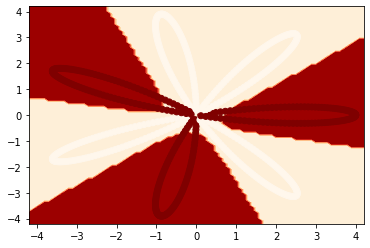

In [54]:
# Plot using the following function call: testModelKeras(X, y, yourmodel)
testModelKeras(X, y, model)

## 3) Cats vs not cats

In the same course from Andrew, they pointed out that there is a terrible shortage of cat-detectors on the internet. Therefore, our class should detect cats in style! Lets download the same dataset. For details, please check out Andrew's Course, which is big fun!

In [55]:
data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'], data['Ytrain']
X_test, y_test = data['Xtest'], data['Ytest']
display(X_train.shape)
display(y_train.shape)

(12288, 209)

(1, 209)

Same functions as before.

In [56]:
def roundValue(A):
    return np.uint8( A > 0.5)

def accuracy(yhat, Y):
    return round(np.sum(yhat==Y) / len(yhat.flatten()) * 1000) / 10

The model will be the same as the two layer model from the course. first layer has 7 units and a Relu activation function. Second layer is the sigmoid cat/no-cat layer.

In [57]:
nx = X_train.shape[0]

np.random.seed(1)

model = NeuralNetwork()
model.addLayer(inputDimension=nx, units=7, activation='relu')
model.addLayer(units=1, activation='sigmoid')
model

[
  1 -> Dense layer (nx=12288, nh=7, activation=relu)
  2 -> Dense layer (nx=7, nh=1, activation=sigmoid)
]

In [58]:
num_iterations = 1000
for ix in range(1, num_iterations+1):
    A = model.forward(X_train)
    model.backward(A, y_train)
    model.update(learning_rate=0.03)
    if ix % 100 == 0:
        yhat_test = roundValue(A)
        print('cost:', model.cost(y_train, A), f'\taccuracy: {accuracy(yhat_test, y_train)}%')     

cost: 0.5638451365986756 	accuracy: 65.6%
cost: 0.5020981427480248 	accuracy: 66.5%
cost: 0.4529594637416238 	accuracy: 81.3%
cost: 0.39260693267512303 	accuracy: 77.5%
cost: 0.4667194566908362 	accuracy: 75.6%
cost: 0.4269087148058202 	accuracy: 75.6%
cost: 0.19321772197055517 	accuracy: 93.3%
cost: 0.15683008303901028 	accuracy: 96.2%
cost: 0.07457567808046689 	accuracy: 98.6%
cost: 0.0667065196173597 	accuracy: 98.6%


Amazing accuracy. But we of course all know we should check this with a proper test set:

In [59]:
A = model.forward(X_test)
yhat_test = roundValue(A)
acc = accuracy(yhat_test, y_test)
acc

72.0

An accuracy of 74% is definitely not bad for such a simple model which only works on pixel values. For the fun of it, lets look at some samples:

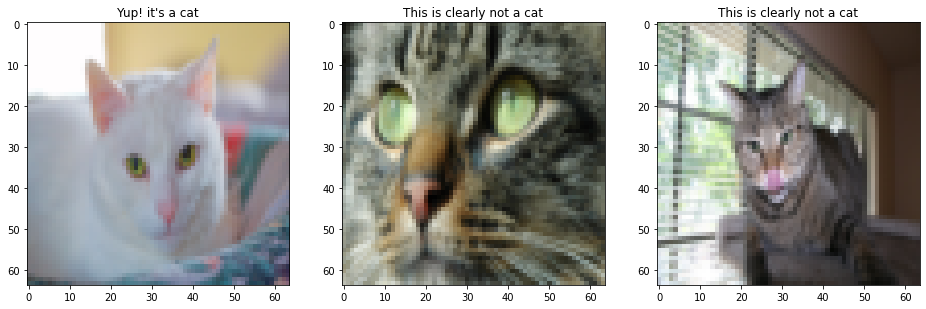

In [60]:
n = 3

imgs = X_test.T.reshape([50, 64, 64, 3])

fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0])
    ax[ix].imshow(imgs[num])
    if yhat.flatten()[num] == 0:
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')


## Q3: Your turn! Let's do this!!! (50 points)

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'].transpose(), data['Ytrain'].transpose()
X_test, y_test = data['Xtest'].transpose(), data['Ytest'].transpose()

# Let's reshape your data here from a 1D vector to a 2D vector 
# This represents a grid of pixel coordinates and 3 values to represent RGB
# Note our RGB values have already been scaled using minmaxscalar as RGB values range from 0, 255
# X_train.shape[0] returns our number of observations in X_train
X_train = X_train.reshape([X_train.shape[0], 64, 64, 3])
X_test = X_test.reshape([X_test.shape[0], 64, 64, 3])

# Let's Display our shapes
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(209, 64, 64, 3)

(209, 1)

(50, 64, 64, 3)

(50, 1)

In [62]:
X_train[0].shape

(64, 64, 3)

### 3.1) Same as before, build a new model with different number of hidden layers, nodes and activation functions. Describe reason for any similarity or difference (30 points) 

In [63]:
X_train_flat = np.asarray([row.flatten() for row in X_train])

In [64]:
# Try using different iterations using a simple layout like above. 10, 100, 1000 epochs. 
# What happens with your loss?
# Let's initialize our model
model = Sequential() # Initialising the ANN

# build your model and compile here:
model.add(Dense(6, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train_flat, y_train, batch_size=1, epochs=10)

Epoch 1/10
209/209 [==============================] - 1s 3ms/step - loss: 1.2255 - accuracy: 0.3971 - precision_4: 0.3533 - recall_4: 0.9028
Epoch 2/10
209/209 [==============================] - 1s 3ms/step - loss: 0.7053 - accuracy: 0.6555 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 3/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.6364 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 4/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6950 - accuracy: 0.6555 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 5/10
209/209 [==============================] - 1s 2ms/step - loss: 0.7027 - accuracy: 0.6555 - precision_4: 0.5000 - recall_4: 0.0139
Epoch 6/10
209/209 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.6220 - precision_4: 0.4000 - recall_4: 0.1944
Epoch 7/10
209/209 [==============================] - 1s 2ms/step - loss: 0.7040 - accuracy: 0.5885 - precision_4: 0.3478 - recall

First we tried a similar structure to the original example but with tanh activation instead of relu, this doesn't have the highest accuracy so we will try others.

In [65]:
# Try using different layers and activation function with different number of nodes
# Let's initialize our model
from keras.layers import Flatten
model = Sequential() # Initialising the ANN

# build your model and compile here:
model.add(Flatten(input_shape=X_train[0].shape))
model.add(Dense(6, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
209/209 [==============================] - 1s 3ms/step - loss: 1.1170 - accuracy: 0.4785 - precision_5: 0.3419 - recall_5: 0.5556
Epoch 2/10
209/209 [==============================] - 1s 3ms/step - loss: 0.7646 - accuracy: 0.6555 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 3/10
209/209 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.6555 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 4/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6863 - accuracy: 0.6555 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 5/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6620 - accuracy: 0.6555 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 6/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6566 - accuracy: 0.6459 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 7/10
209/209 [==============================] - 1s 3ms/step - loss: 0.7180 - accuracy: 0.4450 - precision_5:

This was a test of whether using the built in flatten was any different than flattening first manually. There's a slight difference, but it could just be due to random chance. Now, we will test different structures.

In [66]:
model = Sequential() # Initialising the ANN

# build your model and compile here:
model.add(Flatten(input_shape=X_train[0].shape))
model.add(Dense(4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
209/209 [==============================] - 1s 2ms/step - loss: 0.8512 - accuracy: 0.6316 - precision_6: 0.3529 - recall_6: 0.0833
Epoch 2/10
209/209 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6555 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 3/10
209/209 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6555 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 4/10
209/209 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6555 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 5/10
209/209 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6555 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 6/10
209/209 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6555 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 7/10
209/209 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6555 - precision_6:

With so many nodes I would have expected lower loss at the cost of lower accuracy, eg overfitting. That doesn't seem to be the case, this model is basically worse all across the board. 

In [67]:
model = Sequential() # Initialising the ANN

# build your model and compile here:
model.add(Flatten(input_shape=X_train[0].shape))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
209/209 [==============================] - 1s 3ms/step - loss: 2.0110 - accuracy: 0.5072 - precision_7: 0.2754 - recall_7: 0.2639
Epoch 2/10
209/209 [==============================] - 1s 3ms/step - loss: 1.0249 - accuracy: 0.5885 - precision_7: 0.3750 - recall_7: 0.2917
Epoch 3/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6729 - accuracy: 0.6699 - precision_7: 0.6667 - recall_7: 0.0833
Epoch 4/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.6603 - precision_7: 0.6000 - recall_7: 0.0417
Epoch 5/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6158 - accuracy: 0.6555 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Epoch 6/10
209/209 [==============================] - 1s 3ms/step - loss: 0.6727 - accuracy: 0.6555 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Epoch 7/10
209/209 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.6555 - precision_7: 0.5000 - recall_7: 0.38

In [95]:
# What happens when you add convolutional layers? What happens to our training loss?
# Let's initialize our model
from keras.layers import Conv2D, Flatten
model = Sequential() # Initialising the ANN
# build your convulusional layers here:
model.add(Conv2D(2, 3))
# make sure you flatten after you convulusional layers here:
model.add(Flatten())

# Feel free to add hidden layers here: 
# Hint reduce to a 1d vector as you have in the previous exercises.
model.add(Dense(1, activation='sigmoid'))

# compile your model here:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)
model_conv23 = model

Epoch 1/10
209/209 [==============================] - 2s 3ms/step - loss: 0.7670 - accuracy: 0.5789 - precision_15: 0.3261 - recall_15: 0.2083
Epoch 2/10
209/209 [==============================] - 1s 4ms/step - loss: 0.5237 - accuracy: 0.7464 - precision_15: 0.7021 - recall_15: 0.4583
Epoch 3/10
209/209 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8373 - precision_15: 0.8065 - recall_15: 0.6944
Epoch 4/10
209/209 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8804 - precision_15: 0.8507 - recall_15: 0.7917
Epoch 5/10
209/209 [==============================] - 1s 3ms/step - loss: 0.2539 - accuracy: 0.9234 - precision_15: 0.9242 - recall_15: 0.8472
Epoch 6/10
209/209 [==============================] - 1s 6ms/step - loss: 0.2182 - accuracy: 0.9282 - precision_15: 0.9014 - recall_15: 0.8889
Epoch 7/10
209/209 [==============================] - 1s 6ms/step - loss: 0.1818 - accuracy: 0.9617 - precision_15: 0.9571 - recall_15: 0.9306

Adding a convolutional layer greatly improved our models performance metrics across the board. Our loss decreases; accuracy, precision, and recall are all much higher - over 90%. 
This is without hidden layers also, as we just wanted to see the effect of the convolution. Perhaps if more filters are added, the model will improve.

In [74]:
model = Sequential() 
model.add(Conv2D(4, 3))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)
model_conv43 = model # save for later

Epoch 1/10
209/209 [==============================] - 4s 6ms/step - loss: 0.9135 - accuracy: 0.6029 - precision_13: 0.4127 - recall_13: 0.3611
Epoch 2/10
209/209 [==============================] - 2s 8ms/step - loss: 0.4886 - accuracy: 0.7943 - precision_13: 0.7101 - recall_13: 0.6806
Epoch 3/10
209/209 [==============================] - 2s 8ms/step - loss: 0.3406 - accuracy: 0.8660 - precision_13: 0.8143 - recall_13: 0.7917
Epoch 4/10
209/209 [==============================] - 1s 5ms/step - loss: 0.2238 - accuracy: 0.9187 - precision_13: 0.9104 - recall_13: 0.8472
Epoch 5/10
209/209 [==============================] - 1s 4ms/step - loss: 0.1468 - accuracy: 0.9617 - precision_13: 0.9706 - recall_13: 0.9167
Epoch 6/10
209/209 [==============================] - 1s 4ms/step - loss: 0.0903 - accuracy: 0.9809 - precision_13: 0.9722 - recall_13: 0.9722
Epoch 7/10
209/209 [==============================] - 1s 4ms/step - loss: 0.0707 - accuracy: 0.9809 - precision_13: 0.9595 - recall_13: 0.9861

This model is exactly the same except for an increase in the number of filters. We see that the loss has decreased further and accuracy, precision, and recall have improved further. Now, we will change the kernel size to see the effect of the convolution grid size.

In [72]:
model = Sequential() 
model.add(Conv2D(2, 6))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
209/209 [==============================] - 4s 10ms/step - loss: 0.7533 - accuracy: 0.5550 - precision_11: 0.3220 - recall_11: 0.2639
Epoch 2/10
209/209 [==============================] - 2s 8ms/step - loss: 0.5382 - accuracy: 0.7751 - precision_11: 0.7193 - recall_11: 0.5694
Epoch 3/10
209/209 [==============================] - 1s 7ms/step - loss: 0.4005 - accuracy: 0.8469 - precision_11: 0.8030 - recall_11: 0.7361
Epoch 4/10
209/209 [==============================] - 1s 6ms/step - loss: 0.3180 - accuracy: 0.8947 - precision_11: 0.8906 - recall_11: 0.7917
Epoch 5/10
209/209 [==============================] - 1s 6ms/step - loss: 0.2250 - accuracy: 0.9234 - precision_11: 0.9118 - recall_11: 0.8611
Epoch 6/10
209/209 [==============================] - 1s 6ms/step - loss: 0.1869 - accuracy: 0.9378 - precision_11: 0.9275 - recall_11: 0.8889
Epoch 7/10
209/209 [==============================] - 2s 8ms/step - loss: 0.1204 - accuracy: 0.9713 - precision_11: 0.9714 - recall_11: 0.944

This model is similar to the original but with a different size for the convolution matrix. This has improved the model slightly. Our best model so far was with the 4 filter convolution, so we will combine that with the previously successful hidden layers to see the results.

In [92]:
model = Sequential() 
model.add(Conv2D(4, 3))
model.add(Flatten())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])
model.fit(X_train, y_train, batch_size=1, epochs=10)
model_conv43_hidden = model

Epoch 1/10
209/209 [==============================] - 3s 4ms/step - loss: 0.7826 - accuracy: 0.5981 - precision_14: 0.3889 - recall_14: 0.2917
Epoch 2/10
209/209 [==============================] - 1s 5ms/step - loss: 0.6346 - accuracy: 0.5837 - precision_14: 0.2727 - recall_14: 0.1250
Epoch 3/10
209/209 [==============================] - 2s 8ms/step - loss: 0.6493 - accuracy: 0.6603 - precision_14: 0.5128 - recall_14: 0.2778
Epoch 4/10
209/209 [==============================] - 1s 7ms/step - loss: 0.5837 - accuracy: 0.6316 - precision_14: 0.4786 - recall_14: 0.7778
Epoch 5/10
209/209 [==============================] - 1s 6ms/step - loss: 0.5786 - accuracy: 0.6220 - precision_14: 0.4690 - recall_14: 0.7361
Epoch 6/10
209/209 [==============================] - 1s 7ms/step - loss: 0.5424 - accuracy: 0.6603 - precision_14: 0.5043 - recall_14: 0.8194
Epoch 7/10
209/209 [==============================] - 1s 5ms/step - loss: 0.5937 - accuracy: 0.6794 - precision_14: 0.5225 - recall_14: 0.8056

For some reason, this decreased model performance metrics. We're not exactly sure why, it could be something like the vanishing gradient problem. Regardless, the 4 filter, 3x3 convolution matrix with no hidden layers is the best model so far, that is what we will continue with.

In [75]:
model = model_conv43

### 3.2) Calculate your accuracy (10 points) 

In [98]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# In your classification report since we are only predicting cats you will need to set the parameter labels
# labels=np.unique(yhat_test)
y_test_pred = model_conv23.predict(X_test)
y_test_pred_bin = [[0] if a < 0.5 else [1] for a in y_test_pred]
print(classification_report(y_test, y_test_pred_bin))

2/2 [==============================] - 0s 63ms/step
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.86      0.76      0.81        33

    accuracy                           0.76        50
   macro avg       0.74      0.76      0.75        50
weighted avg       0.78      0.76      0.76        50



It appears that the 4 filter 3x3 convolutional layer was overfitted, so we have returned to the 2 filter 3x3 model.

### 3.3) Calculate your precision and recall manually (10 points) 

In [118]:
# Recall calculation
test = pd.DataFrame()
test['y_test'] = y_test.flatten()
test['y_test_pred'] = np.asarray(y_test_pred_bin).flatten()
test['correct'] = test.apply(lambda x: xnor(x.y_test_pred, x.y_test), axis=1)
# Recall = true positives / (true pos + false neg)
test['true_positive'] = test.apply(lambda x: int(x.y_test and x.y_test_pred), axis=1)
true_pos = test.true_positive.sum()
real_pos = test.y_test.sum()
recall = true_pos/real_pos
print(f'Recall: {recall:.4f}')

Recall: 0.7576


In [119]:
# Precision calculation
# Precision = true positives / (true + false positives)
true_pos = test.true_positive.sum()
all_pos = test.y_test_pred.sum() # true + false pos
precision = true_pos / all_pos
print(f'Precision: {precision:.4f}')

Precision: 0.8621


### Let's plot!!!

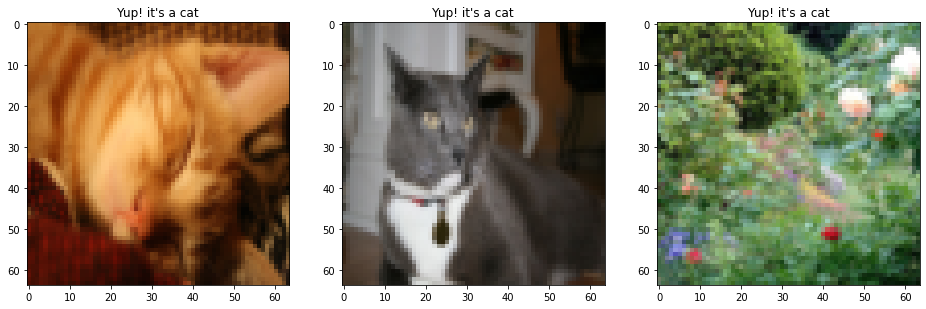

In [121]:
n = 3
imgs = X_test
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0])
    ax[ix].imshow(imgs[num])
    if y_test_pred[num] == 0: # changed to fit my var name
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')

## Round up!

I hope you all had fun, writing your own ANN. In my opinon, writing these things from the ground up is the best way to learn how it actually works. I hope that you see that these systems are not magical, but simple matrix multiplications, unfortunately just a very lot of them. The most difficult part is of course the back propagation, where we need to calculate the gradients. Our simple ANNs are quite doable, but adding more different layers to them, can make it a bit more cumbersome. Still the essence is very similar to what we have done today.

My suggestion is to play around with these structures, rewrite parts of them, or even better, write your own from scratch!


Please let me know if you have any comments!

## Apendix

### Generating Rose Data

In [122]:
def generateRoseData():
    k=7
    pointPerPetal = 100
    cutOff = 0.1
    r = 4

    theta = np.linspace(0,np.pi, pointPerPetal * k)
    xx = r * np.cos(k * theta) * np.cos(theta)
    yy = r * np.cos(k * theta) * np.sin(theta)
    cc = [np.ones(pointPerPetal) if ix % 3 == 0 else np.zeros(pointPerPetal) for ix in np.arange(k)]
    cc = np.roll(np.hstack(cc).astype(np.uint8), -pointPerPetal//2)
    x = xx[(xx**2 + yy**2)**0.5 > cutOff]
    y = yy[(xx**2 + yy**2)**0.5 > cutOff]
    col = cc[(xx**2 + yy**2)**0.5 > cutOff]
    X = np.vstack([x,y])
    Y = np.copy(col).reshape([1, -1])
    return X, Y
X, Y = generateRoseData()
np.savez_compressed('./data/rose/rose.npz', X=X, Y=Y)

### Processing Andrews CatvNotCat data

In [123]:
# If you get an error here, install h5py via pip3 install h5py
import h5py

In [124]:
# Data downloaded from:
# https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
def processCatData():
    train_dataset = h5py.File("./data/cats/train_catvnoncat.h5", mode='r')
    Xtrain = np.array(train_dataset["train_set_x"])
    Y_train = np.array(train_dataset["train_set_y"])
    test_dataset = h5py.File("./data/cats/test_catvnoncat.h5", mode='r')
    Xtest = np.array(test_dataset["test_set_x"])
    Y_test = np.array(test_dataset["test_set_y"])
    X_train = Xtrain / 255
    X_test = Xtest / 255
    X_train = X_train.reshape(209, -1).T
    Y_train = Y_train.reshape(-1, 209)
    X_test = X_test.reshape(50, -1).T
    Y_test = Y_test.reshape(-1, 50)
    return X_train, X_test, Y_train, Y_test
Xtrain, Xtest, Ytrain, Ytest = processCatData()
np.savez_compressed('./data/cats/cats.npz', Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest)

# Credits
#### Edwin Solares - Conversion to google colab, conversion to Keras and preprocessing data to work with Kears
#### Dennis Bakhuis - May the Fourth (be with you) 2020
https://linkedin.com/in/dennisbakhuis/ \
https://github.com/dennisbakhuis


## Exercise 4 - Collaborative Statement (5 points) 
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I did not collaborate with anyone, outside of reading posts on Piazza and reading through keras docs and stack overflow posts for errors. For the document I used we/us pronouns just because that's what I'm used to for these types of papers, but it's just me.